#### customer_channel, buydata 테이블

In [ ]:
# 고객 채널이용정보 CUSTOMER_CHANNEL (2015.10 ~ 2015.12)
#customer_channel = pd.read_excel('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/CUSTOMER_CHANNEL.xlsx')
customer_channel = pd.merge(custdemo_df, channel_df, on='고객번호', how='outer')
customer_channel = pd.merge(customer_channel, membership_df, on='고객번호', how='outer')
customer_channel.to_csv("/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/customer_channel.csv", index = False)

customer_channel_df = customer_channel.copy()
customer_channel_df

,고객번호,성별,연령대,거주지역,제휴사,이용횟수,멤버십명,가입년월
0,1,M,60세이상,60.0,NaN,NaN,NaN,NaN
1,2,M,60세이상,100.0,NaN,NaN,NaN,NaN
2,3,M,60세이상,33.0,NaN,NaN,NaN,NaN
3,4,F,60세이상,16.0,NaN,NaN,NaN,NaN
4,5,M,60세이상,100.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
22728,19379,F,20세~24세,69.0,NaN,NaN,롭스,201412.0
22729,19380,F,20세~24세,39.0,D_MOBILE/APP,1.0,롭스,201412.0
22730,19381,F,40세~44세,460.0,B_MOBILE/APP,5.0,다둥이,201506.0
22731,19382,F,45세~49세,460.0,B_MOBILE/APP,9.0,NaN,NaN


In [ ]:
# 고객DEMO(정보) CUSTDEMO
import pandas as pd
custdemo = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/고객DEMO (CUSTDEMO).txt', encoding='cp949')

# 상품분류 PRODCL
#prodcl = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/상품분류 (PRODCL).txt', encoding='cp949')
prodcl = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/product (중분류명 수정).csv')

# 구매상품 PRODPUR
prodpur = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/구매상품TR (PRODPUR).txt', encoding='cp949')

In [ ]:
custdemo_df = custdemo.copy()
prodcl_df = prodcl.copy()
prodpur_df = prodpur.copy()

In [ ]:
#custdemo_df.info()
#custdemo_df.isna().sum()
custdemo_df.fillna(0.0, inplace=True)

In [ ]:
#custdemo_df.info()

In [ ]:
custdemo_df['거주지역'] = custdemo_df['거주지역'].astype(int)

In [ ]:
# 구매정보 BUYDATA
# prodpur_df : 제휴사, 영수증번호, 소분류코드, 고객번호, 구매일자, 구매시간, 구매금액
# custdemo_df : 고객번호, 성별, 연령대, 거주지역
# prodcl_df : 중분류명, 소분류명

a = prodpur_df.drop(columns=['대분류코드', '중분류코드'])
b = custdemo_df.copy()
c = prodcl_df.iloc[:, 4:]

d = pd.merge(a, b, on='고객번호', how='outer')
e = pd.merge(d, c, on='소분류코드', how='outer')
e[:5]

,제휴사,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,중분류명,소분류명
0,B,8664000,B150401,17218,44,20140222,20,2420,F,50세~54세,100,차/커피,사이다
1,B,8747265,B150401,17218,44,20150627,10,970,F,50세~54세,100,차/커피,사이다
2,B,8720725,B150401,17218,44,20150129,17,1280,F,50세~54세,100,차/커피,사이다
3,B,8725005,B150401,17218,44,20150224,18,1380,F,50세~54세,100,차/커피,사이다
4,B,8748478,B150401,17218,44,20150704,15,980,F,50세~54세,100,차/커피,사이다


In [ ]:
#e.isna().sum()
e.shape

(28593030, 13)

In [ ]:
post_num = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/우편번호 - 거주지명.csv').iloc[:, 1:]
post_num[:5]

,우편번호,시도,시군구
0,564,전라북도,고창군
1,540,전라북도,군산시
2,541,전라북도,군산시
3,543,전라북도,김제시
4,544,전라북도,김제시


In [ ]:
#post_num.isna().sum()
post_num.fillna('---', inplace=True)

In [ ]:
post_num.rename(columns = {'우편번호' : '거주지역'}, inplace=True)
post_num[:5]

,거주지역,시도,시군구
0,564,전라북도,고창군
1,540,전라북도,군산시
2,541,전라북도,군산시
3,543,전라북도,김제시
4,544,전라북도,김제시


In [ ]:
post_num["시도+시군구"] = post_num['시도'] + " " + post_num['시군구']

post_num.drop(columns=['시도', '시군구'], inplace=True)
post_num[:5]

,거주지역,시도+시군구
0,564,전라북도 고창군
1,540,전라북도 군산시
2,541,전라북도 군산시
3,543,전라북도 김제시
4,544,전라북도 김제시


In [ ]:
buydata = pd.merge(e, post_num, on='거주지역', how='outer')
buydata[:5]

,제휴사,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,중분류명,소분류명,시도+시군구
0,B,8664000.0,B150401,17218.0,44.0,20140222.0,20.0,2420.0,F,50세~54세,100,차/커피,사이다,경기도 김포시
1,B,8747265.0,B150401,17218.0,44.0,20150627.0,10.0,970.0,F,50세~54세,100,차/커피,사이다,경기도 김포시
2,B,8720725.0,B150401,17218.0,44.0,20150129.0,17.0,1280.0,F,50세~54세,100,차/커피,사이다,경기도 김포시
3,B,8725005.0,B150401,17218.0,44.0,20150224.0,18.0,1380.0,F,50세~54세,100,차/커피,사이다,경기도 김포시
4,B,8748478.0,B150401,17218.0,44.0,20150704.0,15.0,980.0,F,50세~54세,100,차/커피,사이다,경기도 김포시


In [ ]:
#buydata.shape
#buydata.isna().sum()

(28593441, 15)

In [ ]:
#(28593030, 13)

In [ ]:
#buydata.iloc[:, :-2].dropna(axis=0, inplace=True)
#buydata.shape

In [ ]:
buydata = buydata.iloc[:28593030]
buydata.drop(columns='거주지역', inplace=True)
buydata.shape

(28593030, 13)

In [ ]:
#(28593030, 13)

In [ ]:
buydata.rename(columns={'시도+시군구' : '거주지역'}, inplace=True)
buydata[:5]

,제휴사,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,중분류명,소분류명,거주지역
0,B,8664000.0,B150401,17218.0,44.0,20140222.0,20.0,2420.0,F,50세~54세,차/커피,사이다,경기도 김포시
1,B,8747265.0,B150401,17218.0,44.0,20150627.0,10.0,970.0,F,50세~54세,차/커피,사이다,경기도 김포시
2,B,8720725.0,B150401,17218.0,44.0,20150129.0,17.0,1280.0,F,50세~54세,차/커피,사이다,경기도 김포시
3,B,8725005.0,B150401,17218.0,44.0,20150224.0,18.0,1380.0,F,50세~54세,차/커피,사이다,경기도 김포시
4,B,8748478.0,B150401,17218.0,44.0,20150704.0,15.0,980.0,F,50세~54세,차/커피,사이다,경기도 김포시


In [ ]:
buydata['영수증번호'] = buydata['영수증번호'].astype(int)
buydata['고객번호'] = buydata['고객번호'].astype(int)
buydata['점포코드'] = buydata['점포코드'].astype(int)
buydata['구매일자'] = buydata['구매일자'].astype(int)
buydata['구매시간'] = buydata['구매시간'].astype(int)
buydata['구매금액'] = buydata['구매금액'].astype(int)

In [ ]:
buydata[:5]

,제휴사,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,중분류명,소분류명,거주지역
0,B,8664000,B150401,17218,44,20140222,20,2420,F,50세~54세,차/커피,사이다,경기도 김포시
1,B,8747265,B150401,17218,44,20150627,10,970,F,50세~54세,차/커피,사이다,경기도 김포시
2,B,8720725,B150401,17218,44,20150129,17,1280,F,50세~54세,차/커피,사이다,경기도 김포시
3,B,8725005,B150401,17218,44,20150224,18,1380,F,50세~54세,차/커피,사이다,경기도 김포시
4,B,8748478,B150401,17218,44,20150704,15,980,F,50세~54세,차/커피,사이다,경기도 김포시


In [ ]:
buydata.to_csv("/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/buydata.csv", index = False)

#### A 제휴사의 중분류명으로 전체 상품 분류명 통일

In [ ]:
prodcl_df[prodcl_df['제휴사'] == 'A']['중분류명'].unique()

array(['일용잡화', '육류', '축산가공', '농산물', '수산품', '가공식품', '젓갈/반찬', '건강식품', '주류',
       '차/커피', '기타', '섬유잡화', '액세서리', '화장품', '보석', '준보석/시계', '피혁잡화', '구두',
       '아동', '캐주얼', '커리어', '트래디셔널', '시티웨어', '란제리/내의', '블라우스', '기타의류',
       '디자이너', '모피/피혁', '남성정장', '남성캐주얼', '교복', '셔츠', '남성 트랜디', '스포츠',
       '골프용품', '대형가전', '소형가전', '통신/컴퓨터', '악기', '전자/전기', '주방가전', '명품',
       '주방용품', '문구/팬시', '생활잡화', '식기', '가구', '침구/수예', '웨딩'], dtype=object)

In [ ]:
prodcl_df[prodcl_df['제휴사'] == 'A'].query("중분류명 == '아동'")

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
202,A,3,301,A030101,아동,N/B 아동복
203,A,3,301,A030102,아동,L/C 아동복
204,A,3,301,A030103,아동,수입 아동복
205,A,3,301,A030104,아동,고정행사(아동복)
206,A,3,301,A030105,아동,아동잡화
207,A,3,301,A030106,아동,아동신발
208,A,3,301,A030107,아동,단기행사(아동복)
209,A,3,301,A030108,아동,키즈
210,A,3,301,A030109,아동,유아복
211,A,3,301,A030110,아동,유아용품


- 일용잡화 : 위생세제, 휴지류, 뷰티상품, 세트상품, 단기행사 ...
- 생활잡화 : 생화, 이미용, 캔들디퓨져, 타월, 욕실용품, 매트, 장식소품, 그림, 토탈데코, 소품가구, 기능성침대 ...
- 기타의류 : 홈웨어, 유니폼, 니트단품 ...
- 섬유잡화 : 넥타이, 스카프, 양말, 손수건, 스타킹, 모자, 우/양산, 장갑, 무인양품 ...

In [ ]:
prodcl_df[prodcl_df['제휴사'] == 'B']['중분류명'].unique()[464:]

array(['특산물행사', '블루베리', '체리', '수입포도', '냉동과일', '열대과일기타', '바나나', '파인애플',
       '망고', '키위', '열대과일선물세트', '남성용품', '바디케어', '훼이셜케어', '베이비케어', '풋/핸드케어',
       '미용소품', '아로마', '간식', '남성양말', '여성양말', '아동양말', '덧신', '주니어양말',
       '양말선물세트', '온라인양말', '시즌슈즈', '스포츠슈즈', '아동슈즈', '캐주얼슈즈', '슈즈용품',
       '지갑/벨트', 'TRAVEL', '시즌잡화', '캠핑', '잡곡', '온라인잡곡선식', '포장반찬HMR',
       '냉동HMR', '냉장간편식HMR', '냉장식사HMR', '간편요리', '밥죽류', '비타민', '기능성건강',
       '홍인삼', '수입연어', '수입고등어', '수입갈치', '수입게', '수입기타생선', '냉동규격생선',
       '냉동규격해물', '규격생선선물세트', '냉장규격생선', '온라인규격/간편조리생선', '규격RTC', '간편조리행사',
       '굴비', '반건생선', '굴비/반건생선선물세트', '해초', '조개', '조개살', '연체', '새우',
       '해물선물세트', '온라인해물연체', '멸치', '천연조미료', '황태', '미역/다시마', '멸치황태미역선물세트',
       '마른김', '조미김', '김가공품', '김선물세트', '미국산소고기', '호주산소고기', '수입육선물세트',
       '수입돼지고기', '기타국소고기', '육가공품', '유아식기', '조리용기', '조리도구', '주방가전',
       '시즌/건강가전', '패브릭욕실용품', '매트', '프리미엄매트', '일반욕실용품', 'DIY욕실용품', '수도용품',
       '조명기구', '전구', '전기용품', '안전용품', '공구', '브랜드침구', '성인침구', '아동침구', '가공란',
       '기초화장품', 

- 남성용품 : 남성바디케어, 헤어케어, 훼이셜케어, 면도기, 면도용품 ...
- 베이비케어 : 베이비스킨케어, 베이비클렌저, 임산부케어 ...

In [ ]:
prodcl_df[prodcl_df['제휴사'] == 'B'].query("중분류명 == '아로마'")

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
2755,B,66,6608,B660801,아로마,디퓨져
2756,B,66,6608,B660802,아로마,방향제
2757,B,66,6608,B660803,아로마,입욕제
2758,B,66,6608,B660804,아로마,향수
2759,B,66,6608,B660805,아로마,향초


In [ ]:
prodcl_df[prodcl_df['제휴사'] == 'C']['중분류명'].unique()

array(['국산과일', '수입과일', '냉동과일', '건과일', '견과류', '양곡', '잡곡', '선식류', '엽채류',
       '과채류', '근채류', '두채류', '김치채소류', '버섯류', '양채류', '나물류', '계란류', '선어류',
       '선어가공', '건어류', '건어가공', '해물류', '기타수산', '국내산우육', '국내산돈육', '국내산계육',
       '수입우육', '수입돈육', '기타축산', '반찬류', '간편간식', '식사류', '베이커리', '기타조리식품',
       '우유', '발효유', '치즈버터', '냉장음료', '냉장농산', '냉장수산', '냉장축산', '아이스크림', '만두',
       '냉장간식MS', '냉장식사MS', '냉장기타MS', '냉동MS', '생수', '탄산음료', '과채음료', '커피음료',
       '차음료', '기능성음료', '두유', '소주', '맥주', '와인', '양주', '전통주', '기타음주류',
       '병통조림', '커피류', '담배', '분유', '차류', '건강식품', '즉석식품', '가공건식품', '장류',
       '식용유', '조미료', '케첩마요네즈', '감미료', '가공분말류', '라면', '건면', '쿠키케이크', '스낵',
       '캔디껌류', '초콜렛', '전통과자', '씨리얼', '세탁세제', '화장지', '주방주거세제', '유아용품',
       '화장품', '두발용품', '생리용품', '구강용품', '위생용품', '주방용품', '청소욕실용품', '전기전자',
       '의류잡화', '레저취미', '문화용품', '가정잡화'], dtype=object)

In [ ]:
prodcl_df[prodcl_df['제휴사'] == 'C'].query("중분류명 == '문화용품'")

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
4175,C,17,1706,C170601,문화용품,연필
4176,C,17,1706,C170602,문화용품,볼펜
4177,C,17,1706,C170603,문화용품,매직/보드마카
4178,C,17,1706,C170604,문화용품,형광펜
4179,C,17,1706,C170605,문화용품,샤프/샤프심
...,...,...,...,...,...,...
4235,C,17,1706,C170661,문화용품,여아드레스및소품
4236,C,17,1706,C170662,문화용품,역할놀이
4237,C,17,1706,C170663,문화용품,DIY완구
4238,C,17,1706,C170664,문화용품,기타물놀이용품


In [ ]:
prodcl_df[prodcl_df['제휴사'] == 'D']['중분류명'].unique()

array(['베이직케어', '선케어', '클렌징', '집중케어', '남성케어', '베이비케어', '헤어케어', '바디케어',
       '핸드/풋케어', '구강케어', '여성용품', '피트니스', '건강기능식품', '일반의약외품', '과자', '음료',
       '화장지/티슈', '방향/제습/탈취제', '기기', '미용소품', '양말류', '우산/양산류', '파티/팬시용품',
       '전기용품', '안전용품', '여행용품', '계절팩', '여성', '남성', '베이스메이크업', '아이메이크업',
       '립메이크업', '네일메이크업'], dtype=object)

In [ ]:
#prodcl_df.replace({'sss' : 'sss"}, inplace=True)

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# 경쟁사이용 COMPET
#compet = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/경쟁사이용 (COMPET).txt', encoding='cp949')

# 멤버쉽여부 MEMBERSHIP
#membership = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/멤버십여부 (MEMBERSHIP).txt', encoding='cp949')

# 채널이용 CHANNEL
#channel = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/채널이용 (CHANNEL).txt', encoding='cp949')

# 고객DEMO(정보) CUSTDEMO
custdemo = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/고객DEMO (CUSTDEMO).txt', encoding='cp949')

# 상품분류 PRODCL
#prodcl = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/상품분류 (PRODCL).txt', encoding='cp949')
prodcl = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/prodcl (중분류명 수정).csv')

# 구매상품 PRODPUR
prodpur = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/구매상품TR (PRODPUR).txt', encoding='cp949')

# 고객 채널이용정보 CUSTOMER_CHANNEL (2015.10 ~ 2015.12)
#customer_channel = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/customer_channel.csv')

# 구매정보 BUYDATA
#buydata = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/buydata.csv')

In [ ]:
compet.sort_values(by = '고객번호', inplace=True, ignore_index=True)

'''
membership.sort_values(by = '고객번호', inplace=True, ignore_index=True)
channel.sort_values(by = '고객번호', inplace=True, ignore_index=True)
custdemo.sort_values(by = '고객번호', inplace=True, ignore_index=True)
prodpur.sort_values(by = '고객번호', inplace=True, ignore_index=True)
'''

In [ ]:
# 원본 데이터 copy
compet_df = compet.copy()
customer_channel_df = customer_channel.copy()
buydata_df = buydata.copy()

'''
membership_df = membership.copy()
channel_df = channel.copy()
custdemo_df = custdemo.copy()
prodcl_df = prodcl.copy()
prodpur_df = prodpur.copy()
'''

# 데이터 분석



In [ ]:
prodpur_df

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,A,4752153,4,404,A040401,1,2,20150719,12,116370
1,A,4958362,4,403,A040302,1,12,20150820,15,356530
2,A,4958365,4,404,A040401,1,12,20150820,15,65830
3,A,4958366,4,403,A040302,1,12,20150820,15,122540
4,A,4958368,4,409,A040902,1,12,20150820,15,476900
...,...,...,...,...,...,...,...,...,...,...
28593025,D,255211,4,401,D040107,19383,41,20151004,23,2850
28593026,D,255213,4,402,D040204,19383,41,20151005,20,2000
28593027,D,240796,4,401,D040106,19383,31,20151230,23,6000
28593028,B,9832756,74,7404,B740402,19383,85,20150710,20,4790


In [ ]:
prodpur_df['구매일자'].dtype

dtype('int64')

In [ ]:
prodpur_df['구매일자_년도'] = prodpur_df['구매일자'].astype('string').str[:4]

In [ ]:
prodpur_df_2014 = prodpur_df[prodpur_df['구매일자_년도'] == '2014']
prodpur_df_2015 = prodpur_df[prodpur_df['구매일자_년도'] == '2015']

In [ ]:
buy_amt_2014 = prodpur_df_2014.groupby(['고객번호', '제휴사'])[['구매금액']].sum()
buy_amt_2015 = prodpur_df_2015.groupby(['고객번호', '제휴사'])[['구매금액']].sum()
buy_amt_year = pd.merge(buy_amt_2014, buy_amt_2015, on=['고객번호', '제휴사'], how='outer')

### 고객별, 제휴사별, 년도별 구매금액 증감

In [ ]:
## 고객 1명당 년도별 구매금액 증감
buy_amt_year = buy_amt_year.rename(columns = {'구매금액_x' : '구매_2014',	'구매금액_y' : '구매_2015'})
buy_amt_year['구매_2014'] = buy_amt_year['구매_2014'].fillna(0)
buy_amt_year['구매_2015'] = buy_amt_year['구매_2015'].fillna(0)
buy_amt_year['증감'] = buy_amt_year['구매_2015'] - buy_amt_year['구매_2014']
buy_amt_year['증감 %'] = ((buy_amt_year['구매_2015'] / buy_amt_year['구매_2014']) - 1).round(2)
buy_amt_year

구매_2014     구매_2015          증감  증감 %
고객번호  제휴사                                          
1     A    53043510.0  30183640.0 -22859870.0 -0.43
      B      397940.0    393036.0     -4904.0 -0.01
      C      600217.0    424207.0   -176010.0 -0.29
2     A    46168380.0  53286470.0   7118090.0  0.15
      B       76950.0    132500.0     55550.0  0.72
...               ...         ...         ...   ...
19382 C           0.0      7990.0      7990.0   inf
19383 A           0.0   1104800.0   1104800.0   inf
      B           0.0     48600.0     48600.0   inf
      C           0.0      8590.0      8590.0   inf
      D           0.0   1222410.0   1222410.0   inf

[58631 rows x 4 columns]

### 제휴사별 년도별 구매금액 증감

In [ ]:
df = buy_amt_year.reset_index()

# 제휴사별 년도별 구매금액 증감
a = df.groupby('제휴사')[['구매_2014']].sum()
b = df.groupby('제휴사')[['구매_2015']].sum()

c = pd.merge(a,b, on = '제휴사')
c['증감'] = c['구매_2015'] - c['구매_2014']
c['%'] = round((((c['구매_2015'] / c['구매_2014']) - 1) * 100),2)
c['구매_2014'] = c['구매_2014'].apply(lambda x : '{:,.0f}'.format(x))
c['구매_2015'] = c['구매_2015'].apply(lambda x : '{:,.0f}'.format(x))
c['증감'] = c['증감'].apply(lambda x : '{:,.0f}'.format(x))
c

,구매_2014,구매_2015,증감,%
제휴사,,,,
A,"249,107,710,200","265,733,433,830","16,625,723,630",6.67
B,"56,370,935,091","54,850,751,387","-1,520,183,704",-2.70
C,"23,810,993,186","26,249,977,703","2,438,984,517",10.24
D,"312,202,104","583,153,440","270,951,336",86.79


제휴사 A : 롯데백화점\
제휴사 B : 롯데마트 또는 롯데슈퍼\
제휴사 C : 롯데마트 또는 롯데슈퍼\
제휴사 D : 롭스

### 고객별 년도별 구매금액 증감

In [ ]:
# 고객별 년도별 구매금액 증감
a = df.groupby('고객번호')[['구매_2014']].sum()
b = df.groupby('고객번호')[['구매_2015']].sum()

c = pd.merge(a,b, on = '고객번호')
c['증감'] = c['구매_2015'] - c['구매_2014']
c['%'] = round((((c['구매_2015'] / c['구매_2014']) - 1) * 100),2)
c['구매_2014'] = c['구매_2014'].apply(lambda x : '{:,.0f}'.format(x))
c['구매_2015'] = c['구매_2015'].apply(lambda x : '{:,.0f}'.format(x))
c['증감'] = c['증감'].apply(lambda x : '{:,.0f}'.format(x))
c

,구매_2014,구매_2015,증감,%
고객번호,,,,
1,"54,041,667","31,000,883","-23,040,784",-42.64
2,"46,245,330","53,635,430","7,390,100",15.98
3,"1,893,769","1,271,398","-622,371",-32.86
4,"9,299,616","7,394,194","-1,905,422",-20.49
5,"7,685,880","5,551,190","-2,134,690",-27.77
...,...,...,...,...
19379,"1,190,620","4,588,660","3,398,040",285.40
19380,"522,700","3,390,277","2,867,577",548.61
19381,0,"6,040,669","6,040,669",inf


### 제휴사별, 연령별 매출

In [ ]:
buydata_df[:5]

,제휴사,영수증번호,소분류코드,고객번호,구매일자,구매시간,구매금액,성별,연령대,중분류명,소분류명
0,A,4752153,A040401,1,20150719,12,116370,M,60세이상,트래디셔널,트래디셔널
1,A,4958365,A040401,1,20150820,15,65830,M,60세이상,트래디셔널,트래디셔널
2,A,4958361,A040401,1,20150820,15,61270,M,60세이상,트래디셔널,트래디셔널
3,A,4977901,A040401,1,20150823,12,66020,M,60세이상,트래디셔널,트래디셔널
4,A,5133720,A040401,1,20150918,13,520400,M,60세이상,트래디셔널,트래디셔널


In [ ]:
print(buydata_df.shape)
buydata_df.isna().sum()

(28593030, 11)


제휴사      0
영수증번호    0
소분류코드    0
고객번호     0
구매일자     0
구매시간     0
구매금액     0
성별       0
연령대      0
중분류명     0
소분류명     0
dtype: int64

In [ ]:
# 제휴사별 연령별 매출 (2014년, 2015년)
buydata_df_2014 = buydata_df.query("구매일자 >= 20140101 & 구매일자 <= 20141231")
buydata_df_2015 = buydata_df.query("구매일자 >= 20150101 & 구매일자 <= 20151231")

In [ ]:
a = buydata_df_2014.groupby(['제휴사', '연령대'])[['구매금액']].sum()
b = buydata_df_2015.groupby(['제휴사', '연령대'])[['구매금액']].sum()

c = pd.merge(a, b, on = ['제휴사', '연령대']).reset_index()
c = c.rename(columns = {'구매금액_x' : '구매_2014',	'구매금액_y' : '구매_2015'})

c['증감'] = c['구매_2015'] - c['구매_2014']
c['%'] = round((((c['구매_2015'] / c['구매_2014']) - 1) * 100),2)

c['구매_2014'] = c['구매_2014'].apply(lambda x : '{:,.0f}'.format(x))
c['구매_2015'] = c['구매_2015'].apply(lambda x : '{:,.0f}'.format(x))

c['증감'] = c['증감'].apply(lambda x : '{:,.0f}'.format(x))
c

In [ ]:
c.query("제휴사 == 'A'")

,제휴사,연령대,구매_2014,구매_2015,증감,%
0,A,19세이하,"26,805,970","15,297,120","-11,508,850",-42.93
1,A,20세~24세,"1,309,719,090","1,357,321,400","47,602,310",3.63
2,A,25세~29세,"5,669,289,450","8,687,108,960","3,017,819,510",53.23
3,A,30세~34세,"18,958,147,270","19,706,381,260","748,233,990",3.95
4,A,35세~39세,"36,758,469,370","38,474,525,260","1,716,055,890",4.67
5,A,40세~44세,"42,615,054,440","47,715,251,530","5,100,197,090",11.97
6,A,45세~49세,"46,785,998,660","48,760,075,980","1,974,077,320",4.22
7,A,50세~54세,"40,952,205,730","43,129,285,960","2,177,080,230",5.32
8,A,55세~59세,"29,769,039,590","31,559,373,920","1,790,334,330",6.01
9,A,60세이상,"26,262,980,630","26,328,812,440","65,831,810",0.25


In [ ]:
c.query("제휴사 == 'B'")

,제휴사,연령대,구매_2014,구매_2015,증감,%
10,B,19세이하,"33,476,938","25,579,792","-7,897,146",-23.59
11,B,20세~24세,"348,675,022","377,853,307","29,178,285",8.37
12,B,25세~29세,"1,493,185,265","1,655,476,477","162,291,212",10.87
13,B,30세~34세,"3,986,514,720","4,408,887,591","422,372,871",10.60
14,B,35세~39세,"10,735,536,371","8,561,117,425","-2,174,418,946",-20.25
15,B,40세~44세,"12,170,432,612","11,123,242,528","-1,047,190,084",-8.60
16,B,45세~49세,"11,826,690,675","12,124,349,451","297,658,776",2.52
17,B,50세~54세,"8,475,300,128","8,898,250,406","422,950,278",4.99
18,B,55세~59세,"4,369,397,167","4,644,894,036","275,496,869",6.31
19,B,60세이상,"2,931,726,193","3,031,100,374","99,374,181",3.39


In [ ]:
c.query("제휴사 == 'C'")

,제휴사,연령대,구매_2014,구매_2015,증감,%
20,C,19세이하,"15,282,730","16,412,437","1,129,707",7.39
21,C,20세~24세,"156,114,912","200,484,916","44,370,004",28.42
22,C,25세~29세,"402,376,724","445,869,117","43,492,393",10.81
23,C,30세~34세,"1,897,784,105","2,044,060,907","146,276,802",7.71
24,C,35세~39세,"3,617,872,675","4,349,166,569","731,293,894",20.21
25,C,40세~44세,"4,929,332,125","5,623,249,367","693,917,242",14.08
26,C,45세~49세,"5,738,211,304","5,882,473,891","144,262,587",2.51
27,C,50세~54세,"4,169,091,098","4,805,109,684","636,018,586",15.26
28,C,55세~59세,"1,845,817,079","1,863,662,889","17,845,810",0.97
29,C,60세이상,"1,039,110,434","1,019,487,926","-19,622,508",-1.89


In [ ]:
c.query("제휴사 == 'D'")

,제휴사,연령대,구매_2014,구매_2015,증감,%
30,D,19세이하,"961,300","6,777,360","5,816,060",605.02
31,D,20세~24세,"57,653,950","122,167,790","64,513,840",111.90
32,D,25세~29세,"95,145,950","176,528,730","81,382,780",85.53
33,D,30세~34세,"54,022,740","71,154,040","17,131,300",31.71
34,D,35세~39세,"30,104,555","54,282,420","24,177,865",80.31
35,D,40세~44세,"30,036,889","52,008,050","21,971,161",73.15
36,D,45세~49세,"26,022,190","48,177,520","22,155,330",85.14
37,D,50세~54세,"8,282,110","26,507,180","18,225,070",220.05
38,D,55세~59세,"5,927,810","15,316,310","9,388,500",158.38
39,D,60세이상,"4,044,610","10,234,040","6,189,430",153.03


### 제휴사별 분기(3개월 단위) 매출

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# 제휴사별 분기매출
buydata_df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/purchase6.csv').iloc[:, 1:]

buydata_df['분기'] = np.where(buydata_df['구매일자'] < 20140401, '2014_1분기',
                          np.where(buydata_df['구매일자'] < 20140701, '2014_2분기',
                                   np.where(buydata_df['구매일자'] < 20141001, '2014_3분기',
                                            np.where(buydata_df['구매일자'] < 20150101, '2014_4분기',
                                                     np.where(buydata_df['구매일자'] < 20150401, '2015_1분기',
                                                              np.where(buydata_df['구매일자'] < 20150701, '2015_2분기',
                                                                       np.where(buydata_df['구매일자'] < 20151001, '2015_3분기','2015_4분기')))))))

In [ ]:
buydata_df[:5]

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,분기
0,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,20140228,15,9500,2014_1분기
1,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,2751160,12,20140919,15,5000,2014_3분기
2,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1307657,12,20140130,11,19810,2014_1분기
3,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,3960475,12,20150327,12,1000,2015_1분기
4,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,5602223,12,20151130,17,6800,2015_4분기


In [ ]:
buydata_df.groupby(['제휴사', '분기'], as_index=False)[['구매금액']].sum()

,제휴사,분기,구매금액
0,A,2014_1분기,58019314630
1,A,2014_2분기,60595453280
2,A,2014_3분기,54148109530
3,A,2014_4분기,76344832760
4,A,2015_1분기,63810078350
5,A,2015_2분기,64901119880
6,A,2015_3분기,57927336480
7,A,2015_4분기,79094899120
8,B,2014_1분기,13786999474
9,B,2014_2분기,14224051999


In [ ]:
pd.pivot_table(data=buydata_df, values='구매금액', index='제휴사', columns='분기', aggfunc='sum')

분기,2014_1분기,2014_2분기,2014_3분기,2014_4분기,2015_1분기,2015_2분기,2015_3분기,2015_4분기
제휴사,,,,,,,,
A,58019314630,60595453280,54148109530,76344832760,63810078350,64901119880,57927336480,79094899120
B,13786999474,14224051999,14492140773,13867742845,13986804506,13552533650,14546798162,12764615069
C,5842416599,5663455148,6226595795,6078525644,6522455769,6240494050,6916120548,6570907336
D,46032040,63006970,82868559,120294535,135137330,140526610,146295810,161193690


## 고객의 연령별 분기 구입금액

In [9]:
buydata_df[:1]

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,분기
0,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,20140228,15,9500,2014_1분기


In [10]:
age_q = buydata_df.groupby(['연령대', '분기'], as_index=False)[['구매금액']].sum()
age_q

,연령대,분기,구매금액
0,19세이하,2014_1분기,14323908
1,19세이하,2014_2분기,17101528
2,19세이하,2014_3분기,20318814
3,19세이하,2014_4분기,24782688
4,19세이하,2015_1분기,17921466
...,...,...,...
75,60세이상,2014_4분기,8742979764
76,60세이상,2015_1분기,7209062986
77,60세이상,2015_2분기,7478563404
78,60세이상,2015_3분기,6852277686


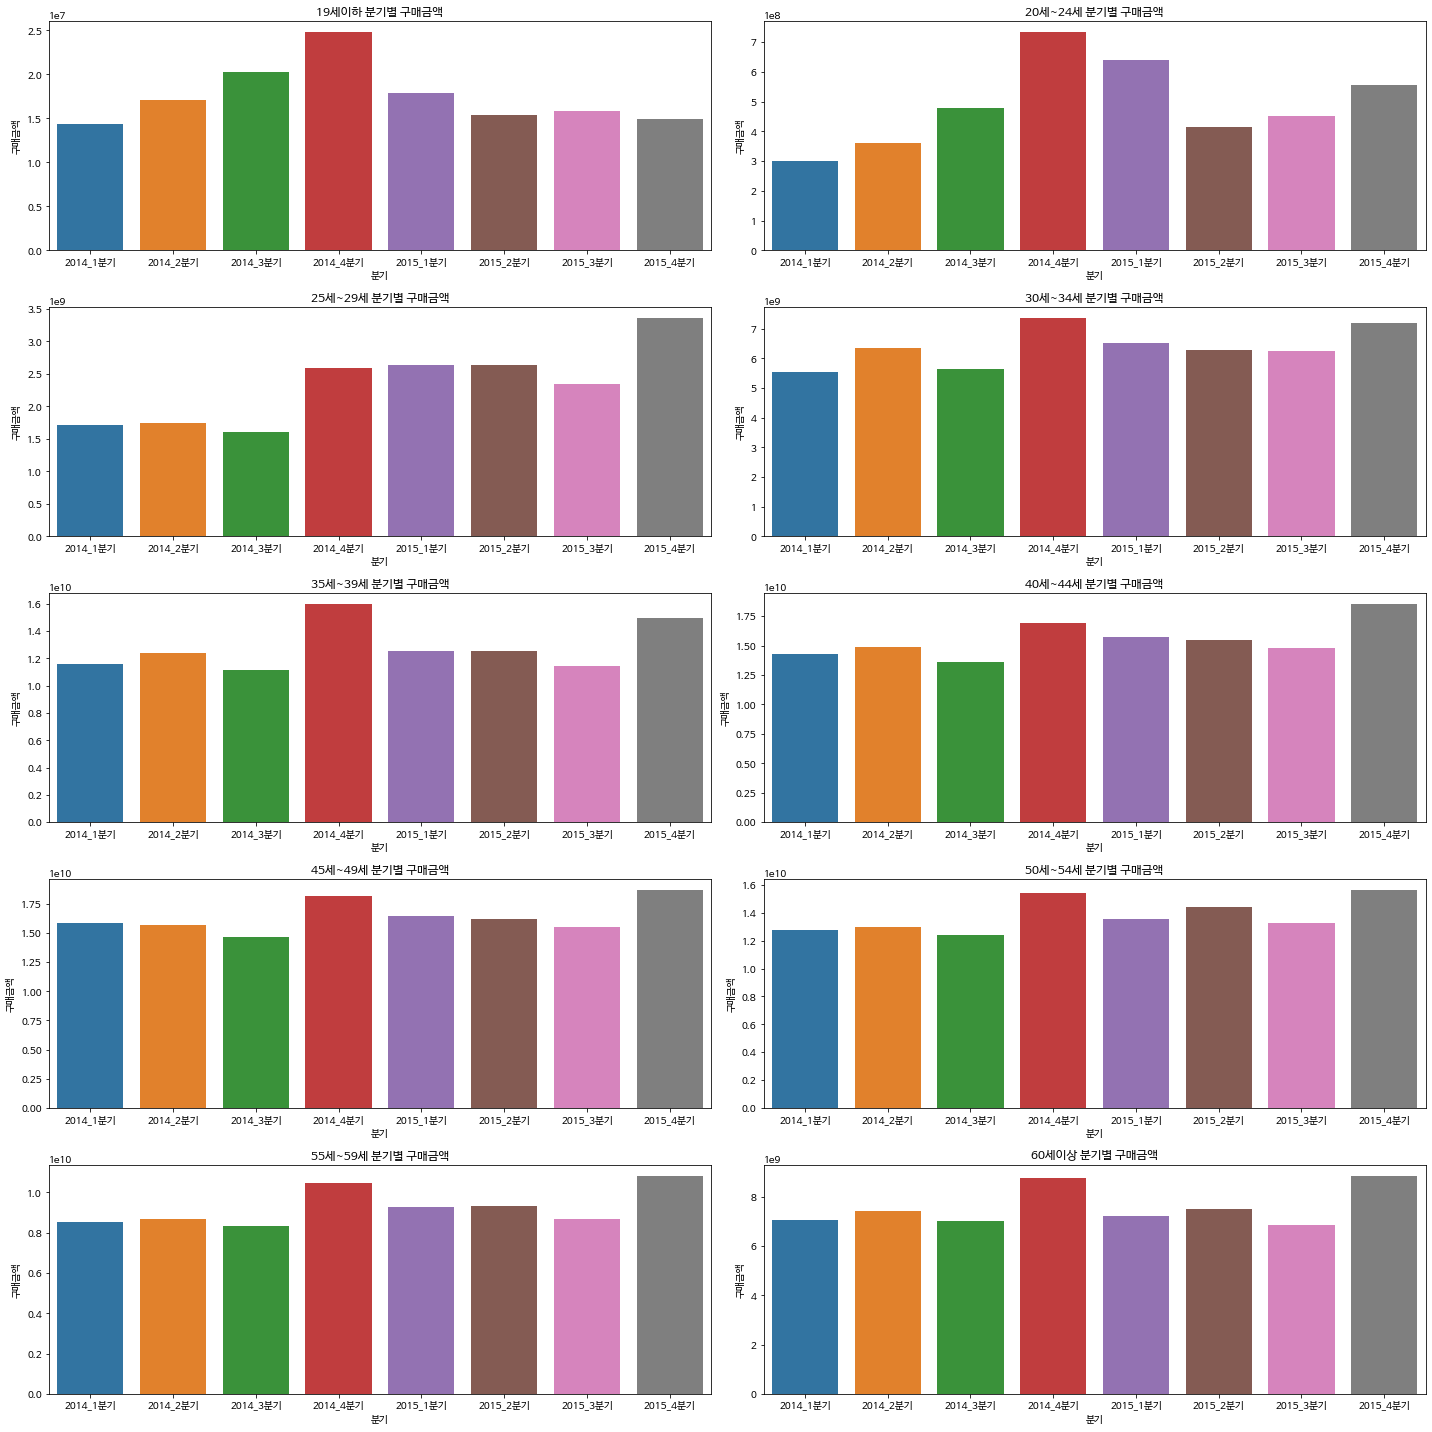

In [12]:
# 고객의 연령별 분기 구매금액
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
fig, axs = plt.subplots(figsize=(20,20), ncols = 2, nrows=5)
lm_features = ['19세이하', '20세~24세', '25세~29세', '30세~34세', '35세~39세', '40세~44세', '45세~49세', '50세~54세', '55세~59세', '60세이상']

for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    # ax(축) 자리 지정
    sns.barplot(data = age_q[age_q['연령대'] == f'{feature}'], x='분기', y='구매금액', ax = axs[row][col]) 
    plt.tight_layout()
    axs[row,col].set_title(f'{feature} 분기별 구매금액')

#plt.savefig('고객연령별_분기금액.png')

#### * 분기별 구매금액이 높은 고객의 연령

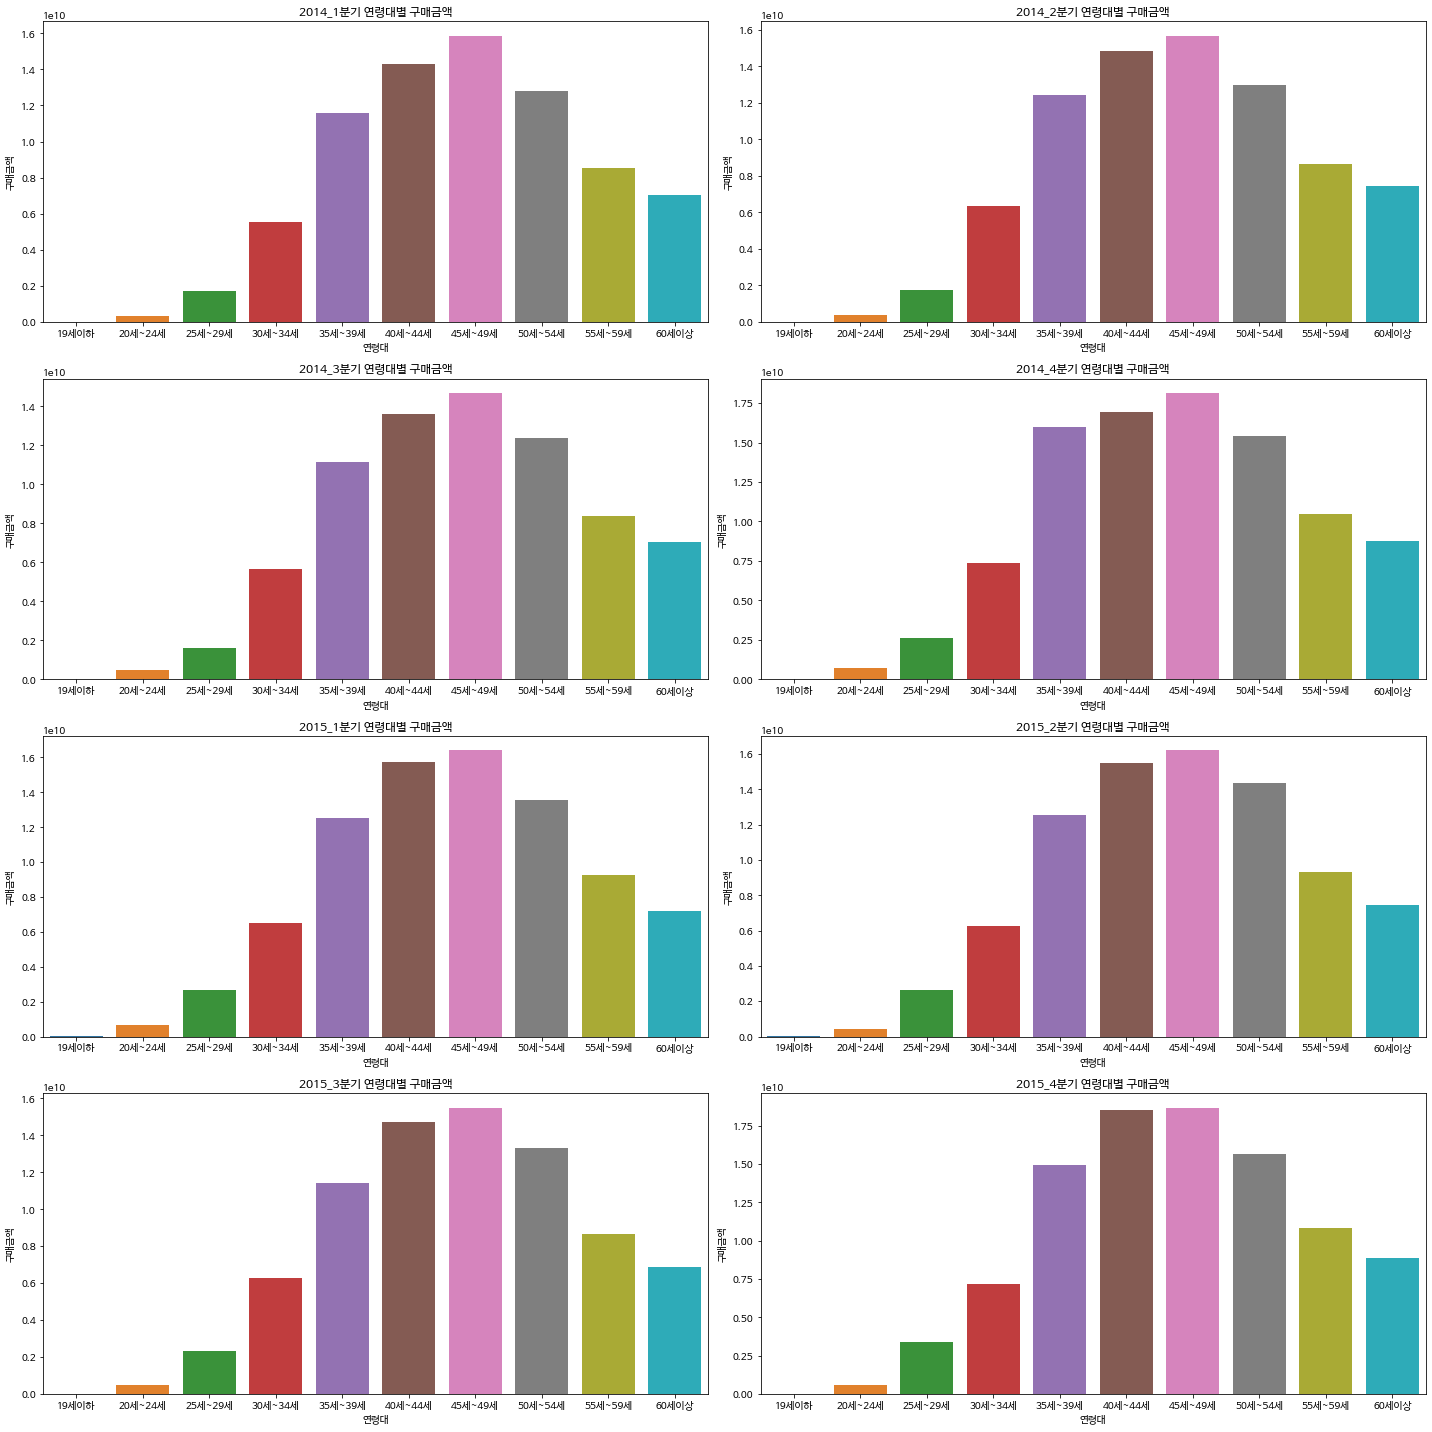

In [13]:
# 분기별 고객 연령대별 구매금액
#import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
fig, axs = plt.subplots(figsize=(20,20), ncols = 2, nrows=4)
lm_features = ['2014_1분기', '2014_2분기', '2014_3분기', '2014_4분기',
               '2015_1분기', '2015_2분기', '2015_3분기', '2015_4분기']

for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    # ax(축) 자리 지정
    sns.barplot(data = age_q[age_q['분기'] == f'{feature}'], x='연령대', y='구매금액', ax = axs[row][col]) 
    plt.tight_layout()
    axs[row,col].set_title(f'{feature} 연령대별 구매금액')

plt.savefig('분기별_고객연령별_구매금액.png')